In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats
import dill
import scipy

In [172]:
df0 = pd.read_csv('mybl_ticker.csv').dropna()
df0_columns = df0.columns
df0.drop('id', axis=1, inplace=True)
df0.tail(2)

,date_added,gspc,vix,tnx,gdaxi,ixic,rut,bsesn,ss,sz,bvsp,cop,wheat,gold,wti,wheat_gold,wti_gold,cop_gold
5348,2021-12-16,4668.669922,20.57,1.422,15636.400391,15180.429688,2152.459961,57901.140625,3675.020020,15112.809570,108212.0,4.3005,803.75,1796.599976,72.379997,0.447373,0.040287,2.393688
5349,2021-12-17,4620.640137,21.57,1.402,15531.690430,15169.679688,2173.929932,57011.738281,3632.360107,14867.549805,107322.0,4.2910,810.00,1803.800049,70.860001,0.449052,0.039284,2.378867


In [173]:
class Correlation_df:
    def __init__(self, data):
        self.data_tr = self.data_tr(data)
        
    def data_tr(self, data):
        list_win_corr = [20]
        set_corr = set()
        for k in list_win_corr:
            for i in ('gspc', 'vix', 'tnx', 'gdaxi', 'ixic', 'rut', 'bsesn', 'ss', 'sz', 'bvsp', \
                      'cop', 'wheat', 'gold', 'wti', 'wheat_gold', 'wti_gold', 'cop_gold'):
                for j in ('gspc', 'vix', 'tnx', 'gdaxi', 'ixic', 'rut', 'bsesn', 'ss', 'sz', 'bvsp', \
                          'cop', 'wheat', 'gold', 'wti', 'wheat_gold', 'wti_gold', 'cop_gold'):
                    if i != j and f'{j}{i}{k}' not in set_corr:
                        data[f'{i}{j}{k}'] = data[i].rolling(window=k).corr(data[j])
                        set_corr.add(f'{i}{j}{k}')
        return data

df = Correlation_df(df0).data_tr

In [174]:
df.head()

,date_added,gspc,vix,tnx,gdaxi,ixic,rut,bsesn,ss,sz,...,goldwti20,goldwheat_gold20,goldwti_gold20,goldcop_gold20,wtiwheat_gold20,wtiwti_gold20,wticop_gold20,wheat_goldwti_gold20,wheat_goldcop_gold20,wti_goldcop_gold20
0,2000-09-14,1480.869995,18.260000,5.774,7048.500000,3913.860107,539.210022,4671.919922,1979.505005,4727.810059,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000-09-15,1465.810059,18.520000,5.833,6999.540039,3835.229980,530.880005,4562.379883,1978.433960,4710.799805,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000-09-18,1444.510010,20.250000,5.871,6891.689941,3726.520020,516.679993,4366.410156,1946.753052,4628.839844,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000-09-19,1459.900024,19.540001,5.850,6937.740234,3865.639893,523.309998,4264.339844,1903.154053,4512.509766,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-20,1451.339966,19.930000,5.892,6765.229980,3897.439941,521.429993,4325.549805,1922.288940,4551.029785,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df_corr = df.drop(['date_added', 'gspc', 'vix', 'tnx', 'gdaxi', 'ixic', 'rut', 'bsesn', 'ss', 'sz', 'bvsp', \
                      'cop', 'wheat', 'gold', 'wti', 'wheat_gold', 'wti_gold', 'cop_gold'], axis=1)

In [176]:
df_corr = df_corr.abs()

In [177]:
df_corr = df_corr.loc[:, df_corr.describe().loc['mean'] > 0.5]

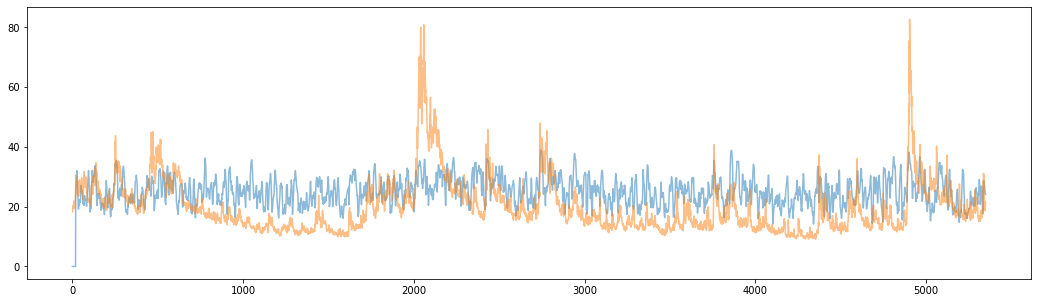

In [178]:
fig, ax = plt.subplots()
fig.set_size_inches(18, 5)
ax.plot(df_corr.sum(axis=1), alpha=0.5)
ax.plot(df.vix, alpha=0.5)
plt.show()

In [179]:
df_corr

,gspcvix20,gspctnx20,gspcgdaxi20,gspcixic20,gspcrut20,gspcbsesn20,gspcbvsp20,gspcwti20,vixgdaxi20,vixixic20,...,sssz20,bvspcop20,bvspwti20,copwti20,copcop_gold20,wheatwheat_gold20,goldwheat_gold20,goldcop_gold20,wtiwti_gold20,wti_goldcop_gold20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5345,0.954225,0.714556,0.762666,0.829124,0.712796,0.620111,0.373747,0.810787,0.866309,0.868065,...,0.932261,0.166348,0.053284,0.659993,0.469418,0.819268,0.542837,0.774509,0.971582,0.037946
5346,0.960955,0.709328,0.762421,0.801279,0.708655,0.643437,0.336983,0.829081,0.845124,0.816109,...,0.935472,0.047048,0.034694,0.621004,0.545024,0.844030,0.478409,0.756023,0.970289,0.023854
5347,0.962801,0.647454,0.706418,0.764464,0.636829,0.586373,0.384963,0.798610,0.795982,0.783293,...,0.929613,0.090288,0.051260,0.580978,0.608497,0.865009,0.327810,0.664048,0.965674,0.123594
5348,0.969293,0.606817,0.712805,0.693387,0.587914,0.582320,0.423312,0.804006,0.776022,0.686180,...,0.932155,0.134997,0.019721,0.676072,0.647888,0.911478,0.239230,0.492775,0.973919,0.295599
